In [2]:
import cv2
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from PIL import Image, ImageDraw
from shapely.geometry import Polygon
from ultralytics import YOLO

In [3]:
def get_list_from_xywh(bb:list):
    x_left = bb[0] - bb[2]/2
    x_right = bb[0] + bb[2]/2
    y_up = bb[1] + bb[2]/2
    y_down = bb[1] - bb[2]/2

    return [[int(x_left), int(y_up)],
            [int(x_right), int(y_up)],
            [int(x_left), int(y_down)],
            [int(x_right), int(y_down)]]

def format_swap(bbx:list):
    bbx_1 = get_list_from_xywh(bbx)
    bbx_1_tmp = bbx_1[-1]
    bbx_1[-1] = bbx_1[-2]
    bbx_1[-2] = bbx_1_tmp
    return bbx_1


def calculate_int(human: list, zone: list, draw=False):
    square = human[2] * human[3]
    # Человека перевожим в координаты
    human = format_swap(human) # Пусть это будет человек
    # Зону просто парсим

    poly_1 = Polygon(human)
    poly_2 = Polygon(zone)
    print("Процент вхождения человека в зону")
    if draw:
      plt.plot(*poly_1.exterior.xy)
      plt.plot(*poly_2.exterior.xy)
    return (poly_1.intersection(poly_2).area / square) * 100

In [9]:
model = YOLO("runs/detect/train22/weights/yolov8n.pt")

a = model("Php-Angc-K3-8_angc4fr16.jpg")



image 1/1 d:\Study\Hack_10.11.2023\Monitoring\Php-Angc-K3-8_angc4fr16.jpg: 384x640 1 person, 203.8ms
Speed: 7.5ms preprocess, 203.8ms inference, 6.5ms postprocess per image at shape (1, 3, 384, 640)


In [12]:
a[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.8869])
data: tensor([[7.4124e+02, 4.1278e+02, 9.5363e+02, 9.7741e+02, 8.8690e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (1080, 1920)
shape: torch.Size([1, 6])
xywh: tensor([[847.4338, 695.0970, 212.3895, 564.6265]])
xywhn: tensor([[0.4414, 0.6436, 0.1106, 0.5228]])
xyxy: tensor([[741.2390, 412.7837, 953.6285, 977.4102]])
xyxyn: tensor([[0.3861, 0.3822, 0.4967, 0.9050]])

In [10]:
human = a[0].boxes.xywh.tolist()[0]
print(human)

zone = []
with open("danger_Php-Angc-K3-8.txt") as file:
    for line in file:      
        string = line.replace(",", "")
        string = string.replace("[", "")
        string = string.replace("]", "")
        string = string.strip()
        zone.append([int(string.split(" ")[0]), int(string.split(" ")[1])])
zone

[847.4337768554688, 695.0969848632812, 212.3895263671875, 564.62646484375]


[[1036, 831], [480, 475], [614, 421], [1171, 691]]

In [22]:
human = [741.2390, 412.7837, 953.6285, 977.4102]

In [29]:
import cv2
import matplotlib.pyplot as plt

b = cv2.imread("Php-Angc-K3-8_angc4fr16.jpg")

b = cv2.rectangle(b, (int(human[0]), int(human[1])), (int(human[2]), int(human[3])), (0, 255, 0), 5) 


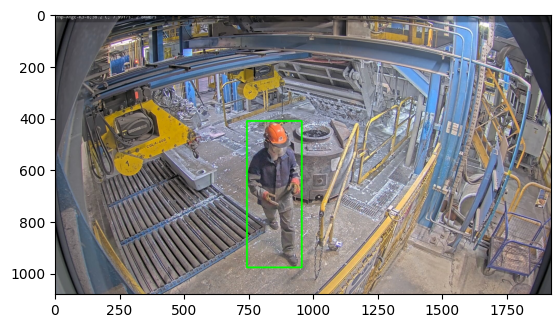

In [30]:
plt.imshow(cv2.cvtColor(b, cv2.COLOR_BGR2RGB))

Процент вхождения человека в зону


21.565033734198725

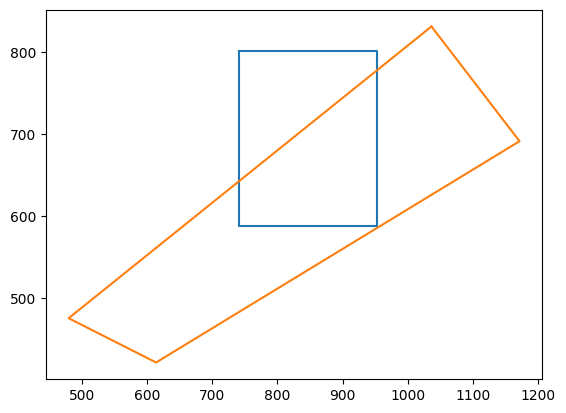

In [45]:
calculate_int(human, zone, draw=True)